Chapter 09

# 圆锥曲线的一般形式
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码的核心是利用数学上的圆锥曲线方程绘制不同类型的几何图形（如圆、椭圆、抛物线和双曲线），并在给定范围内以等高线的形式可视化这些图形。以下是详细的数学描述：

---

### 数学背景与公式

圆锥曲线的通用方程为：
$$
Ax_1^2 + Bx_1x_2 + Cx_2^2 + Dx_1 + Ex_2 + F = 0
$$
其中：
- $A$、$B$、$C$ 决定了曲线的类型，例如：
  - 当 $B^2 - 4AC > 0$ 时，为双曲线；
  - 当 $B^2 - 4AC = 0$ 时，为抛物线；
  - 当 $B^2 - 4AC < 0$ 时，为椭圆或圆。
- $D$、$E$ 决定曲线的位置和偏移；
- $F$ 决定曲线的大小或开口宽度。

---

### 代码实现的功能

1. **生成坐标网格**：
   - 定义 $x_1$ 和 $x_2$ 的取值范围为 $[-5, 5]$，在这个范围内生成 500 个等间距点；
   - 使用 `numpy.meshgrid` 创建二维网格，用于计算每个网格点上的方程值。

2. **计算曲线值**：
   - 对网格点 $(x_1, x_2)$ 代入圆锥曲线方程，计算 $z$ 值，即：
     $$
     z = A x_1^2 + B x_1 x_2 + C x_2^2 + D x_1 + E x_2 + F
     $$

3. **绘制等高线**：
   - 通过 `matplotlib` 的 `contour` 函数绘制 $z = 0$ 的等高线，这条线表示方程的解。

4. **设置图形属性**：
   - 调整坐标轴比例、范围及刻度，添加辅助线（如 $x_1 = 0$ 和 $x_2 = 0$），增强可视化效果。

5. **保存与显示**：
   - 将绘制的图形保存为 `.svg` 格式文件，并在屏幕上显示。

---

### 不同类型曲线的实例

- **圆**：
  $$
  x_1^2 + x_2^2 = 9 \quad (A=1, B=0, C=1, D=0, E=0, F=-9)
  $$

- **椭圆**：
  $$
  \frac{x_1^2}{4} + \frac{x_2^2}{9} = 1 \quad (A=4, B=0, C=9, D=0, E=0, F=-36)
  $$

- **旋转椭圆**：
  $$
  5x_1^2 + 4x_1x_2 + 5x_2^2 = 36 \quad (A=5, B=4, C=5, D=0, E=0, F=-36)
  $$

- **抛物线**：
  $$
  x_2^2 - 4x_1 = 4 \quad (A=0, B=0, C=1, D=-1, E=0, F=-4)
  $$

- **双曲线**：
  $$
  x_1^2 - x_2^2 = 2 \quad (A=1, B=0, C=-1, D=0, E=0, F=-2)
  $$

- **特殊双曲线**（如 $x_1x_2 = 1$）：
  $$
  x_1x_2 = 1 \quad (A=0, B=1, C=0, D=0, E=0, F=-1)
  $$

---

### 输出结果

每种类型的圆锥曲线均绘制在独立的图形中，展示了不同系数下的几何特性及其变化。这种实现方式便于观察和理解圆锥曲线在几何形态上的多样性和对称性。

## 导入包

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 可视化函数

In [2]:
# 圆锥曲线的一般形式
# Ax1^2 + Bx1x2 + Cx2^2 + Dx1 + Ex2 + F = 0

def conic_plot(A, B, C, D, E, F, title):  # 定义绘制圆锥曲线的函数，参数为方程系数和标题
    x1 = np.linspace(-5, 5, 500)  # 生成 x1 的取值范围，从 -5 到 5，包含 500 个点
    x2 = np.linspace(-5, 5, 500)  # 生成 x2 的取值范围，从 -5 到 5，包含 500 个点
    x1, x2 = np.meshgrid(x1, x2)  # 生成网格点，用于绘制二维曲线

    z = A * x1**2 + B * x1 * x2 + C * x2**2 + D * x1 + E * x2 + F  # 计算圆锥曲线的值

    fig, ax = plt.subplots(figsize=(6, 6))  # 创建绘图窗口，设置图形大小
    ax.contour(x1, x2, z, levels=[0], colors='blue')  # 绘制等高线，曲线表示方程为 0 的解
    plt.title(title)  # 设置图形标题
    plt.xlabel('x1')  # 设置 x 轴标签
    plt.ylabel('x2')  # 设置 y 轴标签
    ax.set_aspect('equal', 'box')  # 设置坐标轴比例相同
    ax.set_xlim(-5, 5)  # 设置 x 轴范围
    ax.set_ylim(-5, 5)  # 设置 y 轴范围
    ax.set_xticks(np.arange(-5, 6, 1))  # 设置 x 轴刻度
    ax.set_yticks(np.arange(-5, 6, 1))  # 设置 y 轴刻度
    plt.axhline(0, color='black', linewidth=0.5)  # 绘制 y=0 的辅助线
    plt.axvline(0, color='black', linewidth=0.5)  # 绘制 x=0 的辅助线
    plt.grid(True, linestyle='-', color='0.8', alpha=0.7)  # 添加网格线，设置样式和透明度
    plt.savefig(title + '.svg')  # 保存图形为 SVG 格式文件
    plt.show()  # 显示图形

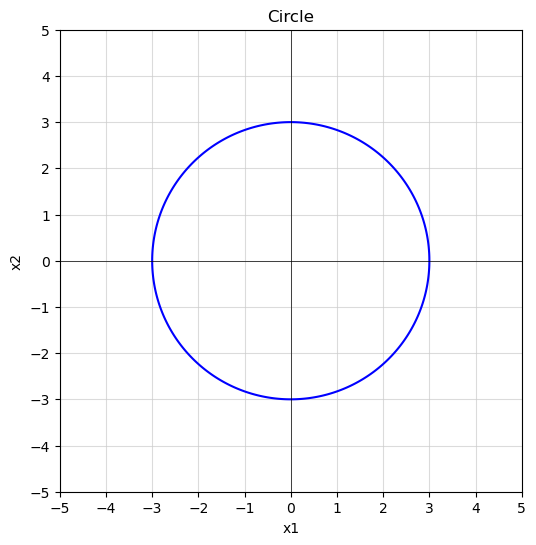

In [3]:
# 绘制不同的圆锥曲线

# 示例1: 正圆 A = 1, B = 0, C = 1, D = 0, E = 0, F = -9
conic_plot(1, 0, 1, 0, 0, -9, "Circle")

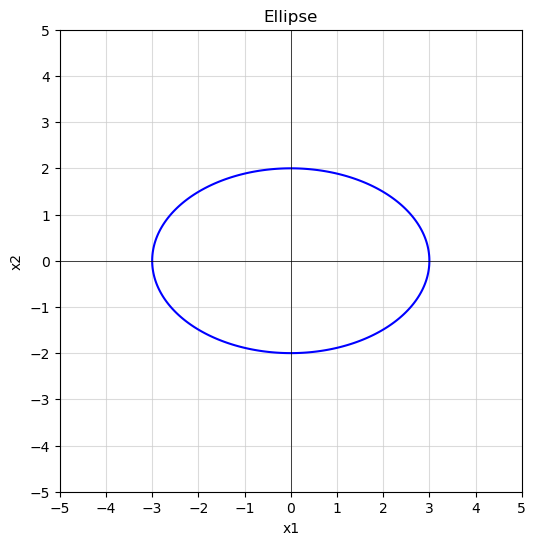

In [4]:
# 示例2: 椭圆 A = 4, B = 0, C = 9, D = 0, E = 0, F = -36
conic_plot(4, 0, 9, 0, 0, -36, "Ellipse")

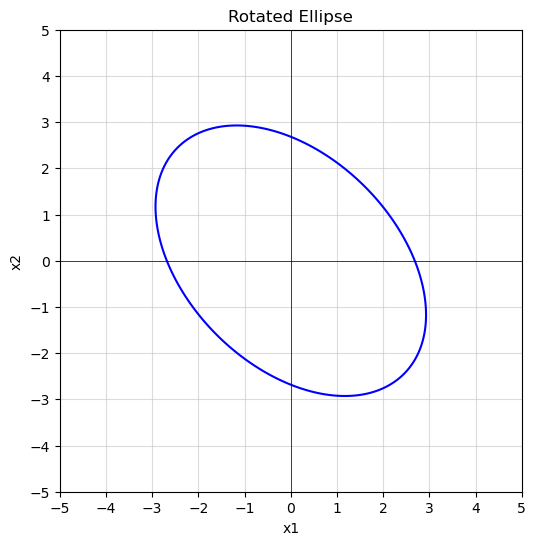

In [5]:
# 示例3: 旋转椭圆 A = 5, B = 4, C = 5, D = 0, E = 0, F = -50
conic_plot(5, 4, 5, 0, 0, -36, "Rotated Ellipse")

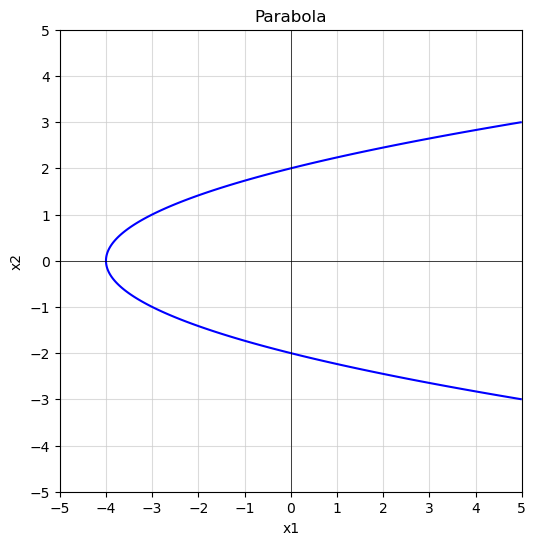

In [6]:
# 示例4: 抛物线 A = 0, B = 0, C = 1, D = -4, E = 0, F = 16
conic_plot(0, 0, 1, -1, 0, -4, "Parabola")

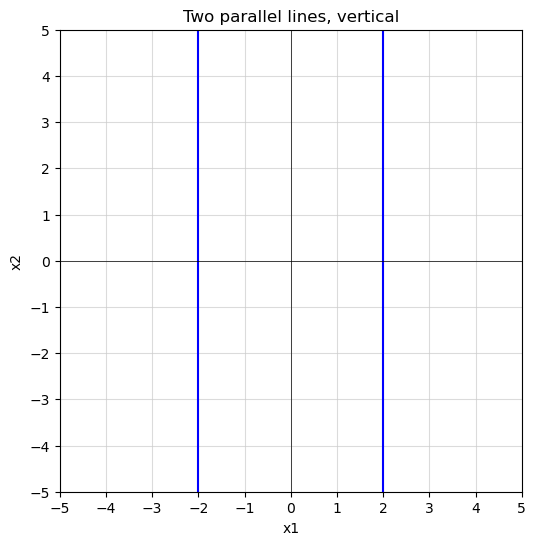

In [7]:
# 示例5: A = 1, B = -2, C = 0, D = 0, E = 0, F = 0
conic_plot(1, 0, 0, 0, 0, -4, "Two parallel lines, vertical")

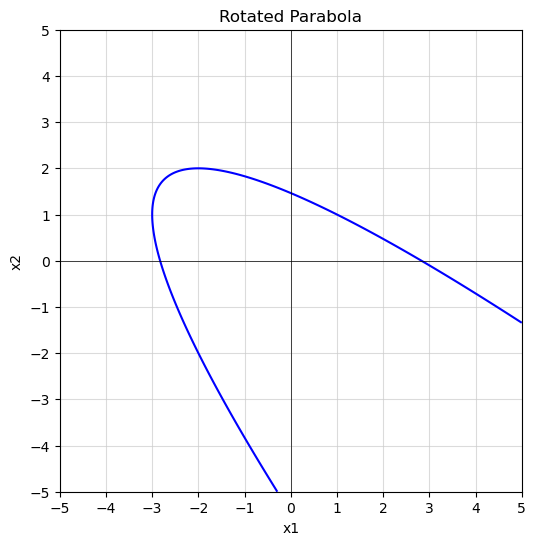

In [8]:
# 示例5: 旋转抛物线 A = 1, B = -2, C = 0, D = 0, E = 0, F = 0
conic_plot(1, 2, 1, 0, 4, -8, "Rotated Parabola")

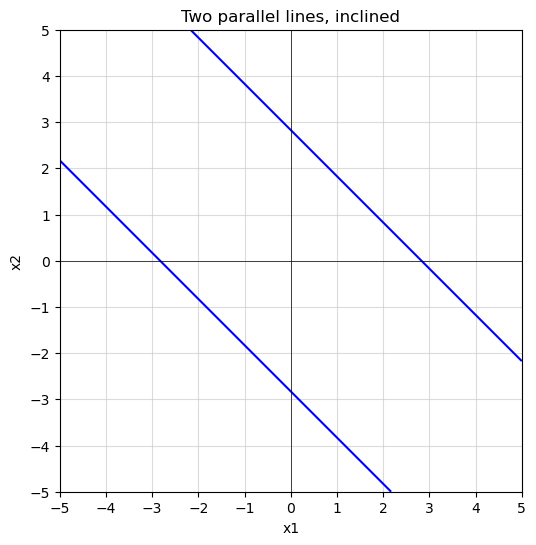

In [9]:
# 示例5: A = 1, B = -2, C = 0, D = 0, E = 0, F = 0
conic_plot(1, 2, 1, 0, 0, -8, "Two parallel lines, inclined")

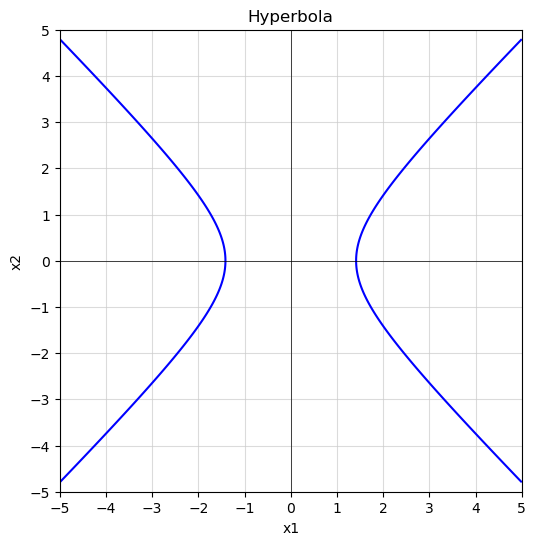

In [10]:
# 示例6: 双曲线 A = 1, B = 0, C = -1, D = 0, E = 0, F = -25
conic_plot(1, 0, -1, 0, 0, -2, "Hyperbola")

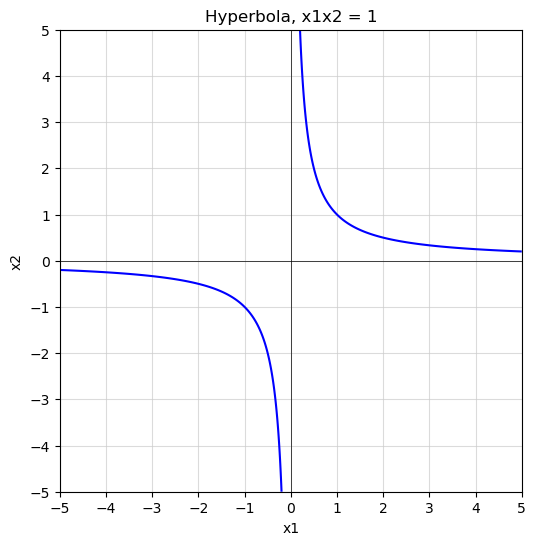

In [11]:
# 示例10: 圆锥曲线 A = 0, B = 1, C = 0, D = 0, E = 0, F = -1
conic_plot(0, 1, 0, 0, 0, -1, "Hyperbola, x1x2 = 1")

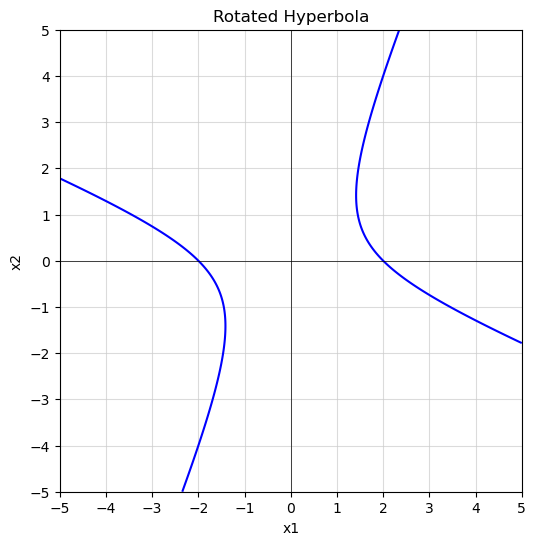

In [12]:
# 示例7: 旋转双曲线 A = 1, B = 2, C = -1, D = 0, E = 0, F = -50
conic_plot(1, 2, -1, 0, 0, -4, "Rotated Hyperbola")

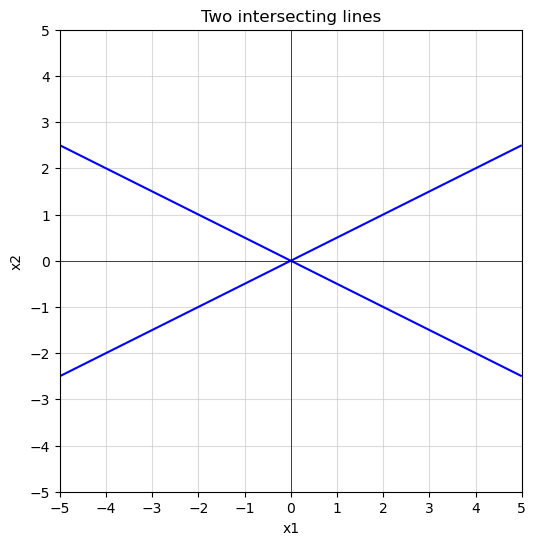

In [13]:
# 示例8: 蜕化双曲线 A = 1, B = 0, C = -1, D = 0, E = 0, F = 0
conic_plot(1, 0, -4, 0, 0, 0, "Two intersecting lines")

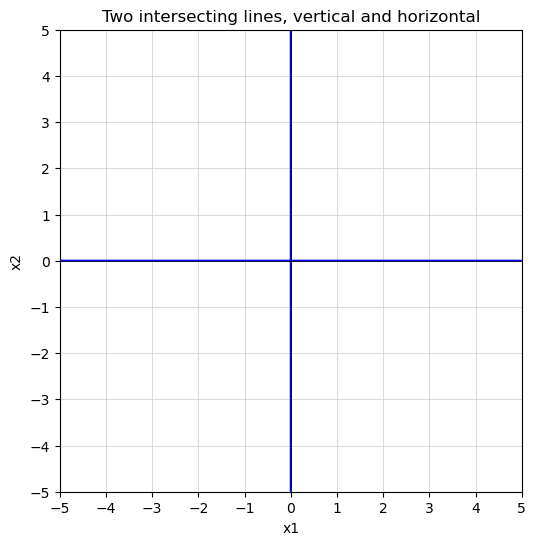

In [14]:
# 示例10: 圆锥曲线 A = 0, B = 1, C = 0, D = 0, E = 0, F = -1
conic_plot(0, 1, 0, 0, 0, 0, "Two intersecting lines, vertical and horizontal")